In [ ]:
# App review Sentiment Analysis =>
    # App review sentiment analysis means evaluating and understanding the sentiment
    # expressed in user reviews of mobile applications

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/linkedin-reviews.csv")

In [ ]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.sample()

,Review,Rating
443,App started out strong but recent app update n...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
# Exploratory Data Analysis ==>
#                         We will start by analyzing the distributions of ratings . It will provide insight into the
#  overall sentiment of the reviews Then we can explore further,such as analyzing the length of reviews
#  and possibly derive insights from the text of the reviews.


In [ ]:
 # Plotting The distribution of ratings

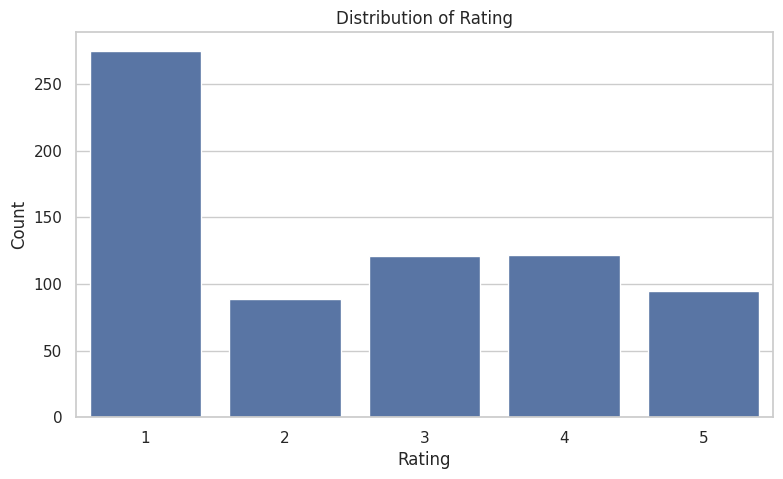

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
sns.countplot(data = df , x='Rating')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# Adding Sentiment Labels in The data -->
#           We will use Textblob library . Textblob provides a polarity scores raning from
# -1(very negative) to 1(very positive) for a giver text
#  We can use this score to classify each reviews sentiment as positive , negative or neutral

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
def textblob_sentiment_analysis(review):
  sentiment=TextBlob(review).sentiment
  if sentiment.polarity>0.1:
    return "Positive"
  elif sentiment.polarity <-0.1:
    return "Negative"
  else:
    return "Neutral"

In [ ]:
df['sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

In [ ]:
df.sample(5)

,Review,Rating,sentiment
83,Doesn't do much of anything - no email or othe...,1,Neutral
187,Would be 5 stars but needs option to keep me l...,4,Neutral
389,Is not working after update.,1,Neutral
65,Force close. Worked fine before update.,1,Positive
650,Please add Group functions!!!!,4,Neutral


In [ ]:
# Analyzing App Reviews Sentiments

In [ ]:
sentiment_distribution = df['sentiment'].value_counts()
sentiment_distribution

,count
sentiment,
Positive,298
Neutral,297
Negative,107


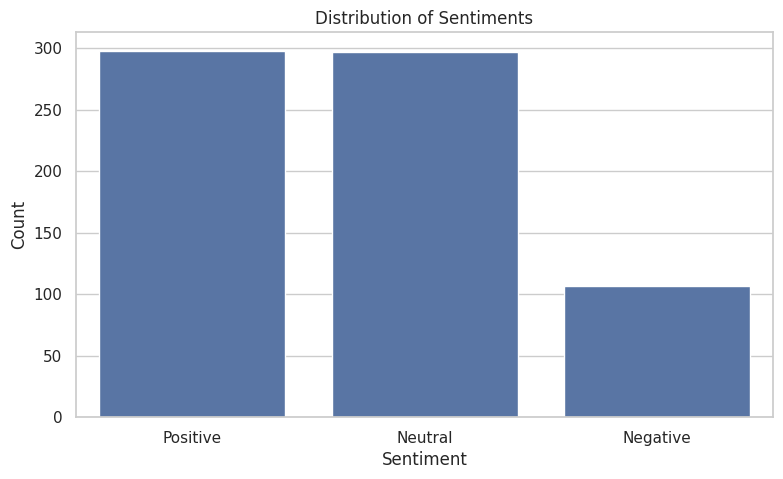

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(x=sentiment_distribution.index,
            y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
# So , we can see althrough the app has low ratings , still the reviewers don't use
#  many negative words in the reviews for the app.
# Next we will explore the relationship between the sentiments and the ratings . This analysis
# can help us understand whether there is a correlation between the sentiment of the text
# numerical ratings


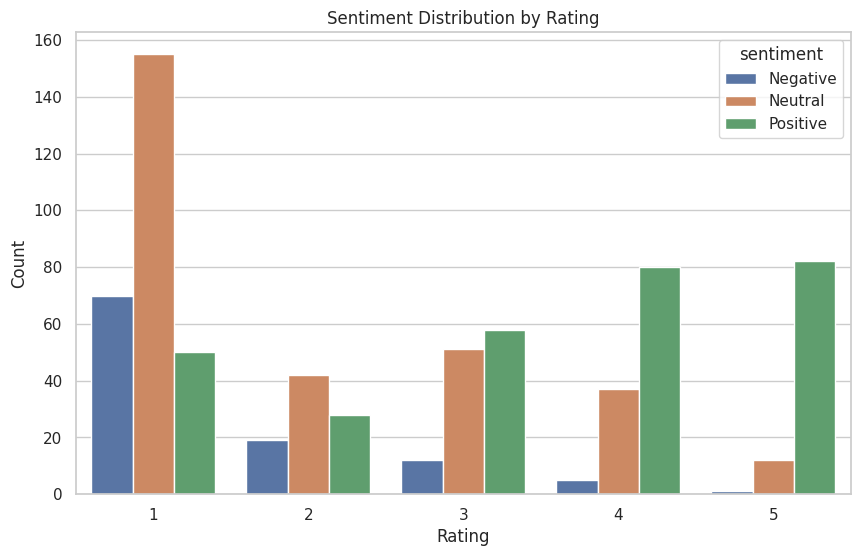

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Rating", hue="sentiment", data=df)
plt.title("Sentiment Distribution by Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend(title="sentiment")
plt.show()

In [ ]:
# Summary ==>
# App Reviews sentiment Analysis is a valuble tool for app developers and businees to understand user feedback,prioritize
# feature updates and maintain a positive user comunity . It involves using data analysis techinique to determine whether
# the sentiments in these reviews are positive negative or neutral